In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer
from sklearn.ensemble import AdaBoostRegressor
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [4]:
dp = pd.read_csv("C:/Users/손호진/Desktop/지역별/가로림연안1_연안.csv", encoding = "euc-kr")
dp

,Latitude [degrees_north],Longitude [degrees_east],project_name,station,yyyy-mm-dd hh:mm:ss,부유물질 농도[μg/L],수소이온농도[무단위],수심(text),수온[℃],아질산성질소[μg/L],염분[psu],용존무기질소[μg/L],용존산소[mg/L],인산염인[μg/L],질산성질소[μg/L],화학적산소요구량[mg/L]
0,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-02-01 00:00:00,55.3,8.14,표층,2.90,7.28,32.34,63.56,10.0571,14.88,52.08,1.24
1,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-05-01 00:00:00,51.6,8.01,표층,9.80,12.00,31.39,195.00,8.5100,3.00,163.00,0.92
2,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-08-01 00:00:00,43.0,8.19,표층,23.30,8.00,31.63,451.00,7.0858,1.00,34.00,0.47
3,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-11-01 00:00:00,34.3,7.84,표층,14.60,5.00,32.47,46.00,7.6900,3.00,40.00,0.30
4,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1998-02-01 00:00:00,57.3,7.91,표층,5.01,1.00,32.44,118.00,8.5100,16.00,110.00,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,36.946389,126.326944,해양환경측정망,가로림연안1_연안,2018-11-12 14:10:00,14.8,8.13,0,15.30,9.50,31.44,147.40,7.8500,23.40,126.90,1.27
88,36.946389,126.326944,해양환경측정망,가로림연안1_연안,2019-02-12 00:00:00,27.6,8.01,0,3.69,1.80,31.68,182.10,10.3900,25.90,172.10,1.29
89,36.946389,126.326944,해양환경측정망,가로림연안1_연안,2019-05-06 00:00:00,30.7,8.09,0,10.25,2.90,31.73,123.10,9.6500,15.40,120.10,1.72
90,36.946389,126.326944,해양환경측정망,가로림연안1_연안,2019-08-06 11:58:00,18.2,8.09,0,24.07,4.90,31.63,48.20,7.7200,12.40,28.70,1.51


In [5]:
dp.head()

,Latitude [degrees_north],Longitude [degrees_east],project_name,station,yyyy-mm-dd hh:mm:ss,부유물질 농도[μg/L],수소이온농도[무단위],수심(text),수온[℃],아질산성질소[μg/L],염분[psu],용존무기질소[μg/L],용존산소[mg/L],인산염인[μg/L],질산성질소[μg/L],화학적산소요구량[mg/L]
0,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-02-01 00:00:00,55.3,8.14,표층,2.90,7.28,32.34,63.56,10.0571,14.88,52.08,1.24
1,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-05-01 00:00:00,51.6,8.01,표층,9.80,12.00,31.39,195.00,8.5100,3.00,163.00,0.92
2,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-08-01 00:00:00,43.0,8.19,표층,23.30,8.00,31.63,451.00,7.0858,1.00,34.00,0.47
3,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1997-11-01 00:00:00,34.3,7.84,표층,14.60,5.00,32.47,46.00,7.6900,3.00,40.00,0.30
4,36.946389,126.326944,해양환경측정망,가로림연안1_연안,1998-02-01 00:00:00,57.3,7.91,표층,5.01,1.00,32.44,118.00,8.5100,16.00,110.00,0.92


In [6]:
col = ['부유물질 농도[μg/L]', '수소이온농도[무단위]', '수온[℃]', '아질산성질소[μg/L]', '염분[psu]', '용존무기질소[μg/L]', '용존산소[mg/L]', '인산염인[μg/L]', '질산성질소[μg/L]', '화학적산소요구량[mg/L]']

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 1s 5ms/step - loss: 0.0802
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0700
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0635
Epoch 4/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0684
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0659
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0704
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0677
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0684
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0734
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0721
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 26/40
9/9 [==============================] - 0s 10ms/step - loss: 0.0621
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0677
Epoch 28/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0572
Epoch 29/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0623
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0628
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0636
Epoch 32/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0627
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0556
Epoch 36/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.04

9/9 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 10/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0194
Epoch 11/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 13/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0288
Epoch 14/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 15/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 16/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 17/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0275
Epoch 18/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0213
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 20/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0212

9/9 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 38/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 39/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0301
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0253
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0191
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 5/40
9/9 [=

9/9 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 16/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 21/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 22/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 24/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 25/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 26/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 27/40
9/9 [==============================] - 0s 6ms/step - loss: 0.004

9/9 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 5/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 7/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 11/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 12/40
9/9 [=====

9/9 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 24/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 25/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 27/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 29/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 31/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 32/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 33/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 34/40
9/9 [==============================] - 0s 4ms/step - loss: 0.003

9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 9/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 14/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 17/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0027
Ep

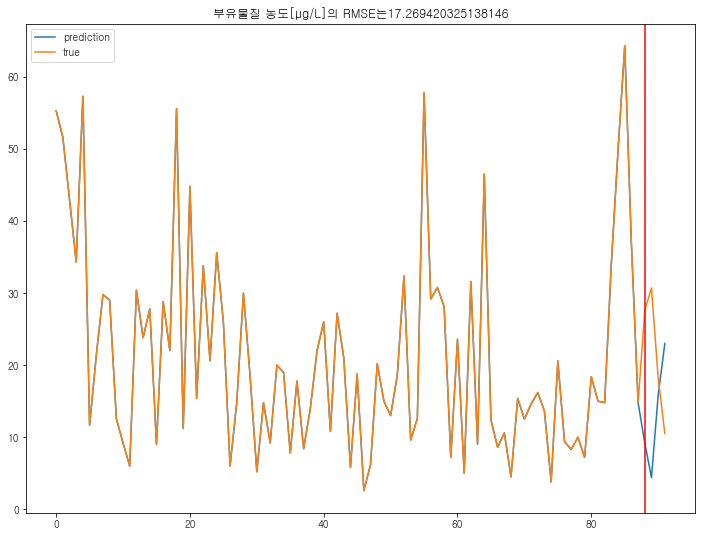

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 1s 5ms/step - loss: 0.1543
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0692
Epoch 3/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 5/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0440
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0417
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0383
Epoch 8/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0409
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0393
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0378
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0394
Epoch 12/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0351
Epoch 13/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0346
Epoch 

9/9 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0424
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0438
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0459
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0445
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0367
Epoch 32/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0348
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0364
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0338
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0282
Epoch 37/40
9/9 [==============================] - 0s 6ms/step - loss: 0.035

9/9 [==============================] - 0s 5ms/step - loss: 0.0332
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0311
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0247
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0340
Epoch 13/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0344
Epoch 14/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0278
Epoch 15/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 16/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0323
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0342
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0260
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0242
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0248

9/9 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0153
Epoch 38/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 39/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0412
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0253
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0269
Epoch 5/40
9/9 [=

9/9 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 16/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 17/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 18/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 21/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 22/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 23/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 24/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 26/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 27/40
9/9 [==============================] - 0s 4ms/step - loss: 0.004

9/9 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0205
Epoch 2/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 3/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 4/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 5/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 7/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 8/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 10/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 11/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 12/40
9/9 [=====

9/9 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 23/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 24/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 27/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 28/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 29/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 30/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 31/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 32/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 33/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.002

9/9 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 6/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 7/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 9/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 10/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 12/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 14/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 15/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0017
Ep

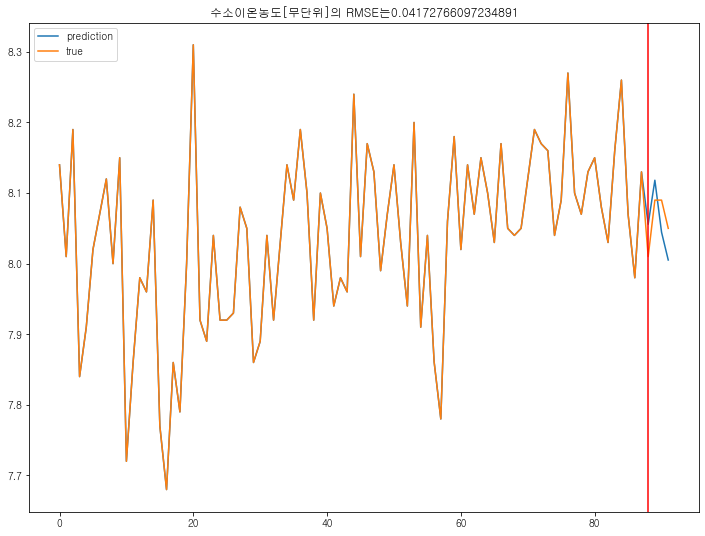

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 2s 5ms/step - loss: 0.1913
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0944
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0902
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0780
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0846
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0817
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0809
Epoch 10/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0793
Epoch 11/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0770
Epoch 12/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 13/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0759
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 26/40
9/9 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 27/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0118
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 30/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 31/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0122
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.01

9/9 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 14/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 17/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0071

9/9 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 34/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 35/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 36/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 37/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 38/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 39/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 5/40
9/9 [=

9/9 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 17/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 21/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 22/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 24/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.006

9/9 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 6/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 9/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 12/40
9/9 [=====

9/9 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 23/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 24/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 25/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.003

9/9 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 6/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 8/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 9/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 14/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 15/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 16/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 17/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0028
Ep

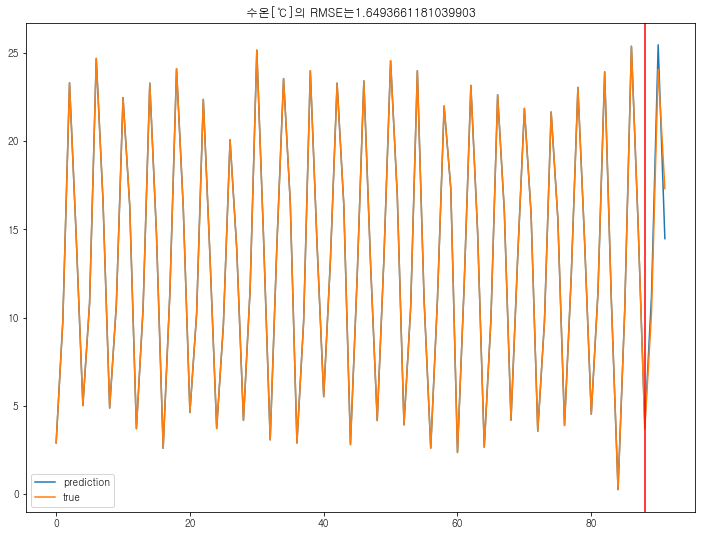

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0745
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0745
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0732
Epoch 6/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0762
Epoch 7/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0710
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0692
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0702
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0677
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0738
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0453
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0415
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0445
Epoch 28/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0447
Epoch 29/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0405
Epoch 30/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0388
Epoch 31/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0389
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0443
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0347
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0279
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0406
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.031

9/9 [==============================] - 0s 5ms/step - loss: 0.0183
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 14/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0129
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 18/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 19/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0132
Epoch 20/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0151

9/9 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 35/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 38/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 39/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0313
Epoch 2/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0193
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 5/40
9/9 [=

9/9 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 16/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0067
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 19/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 21/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 22/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 24/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.003

9/9 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 4/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 6/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 8/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 12/40
9/9 [====

9/9 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 24/40
9/9 [==============================] - 0s 5ms/step - loss: 8.8965e-04
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 13/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 14/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0013
Ep

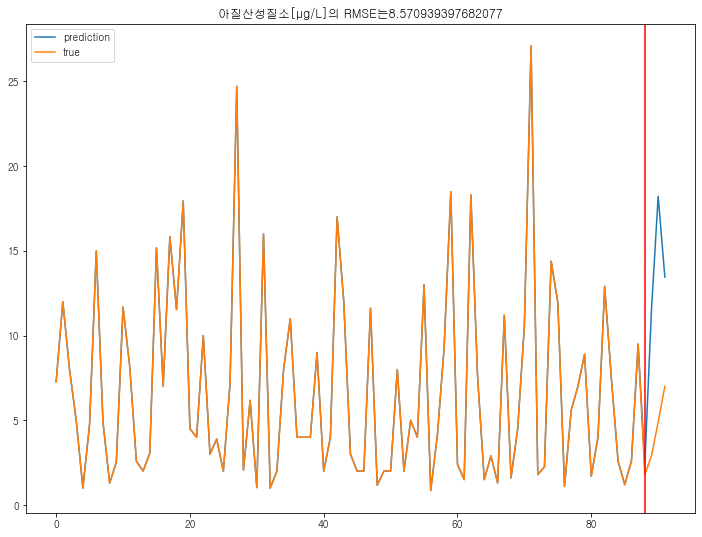

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 1s 5ms/step - loss: 0.2296
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0598
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0448
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0564
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0499
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 8/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0444
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0415
Epoch 11/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0447
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0418
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.0590
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0600
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0639
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0609
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0595
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 32/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0599
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0605
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0653
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0633
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0604
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.060

9/9 [==============================] - 0s 5ms/step - loss: 0.0280
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0288
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0258
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0266
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0274
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0226
Epoch 14/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0234
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0253
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0239
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0301

9/9 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 34/40
9/9 [==============================] - 0s 14ms/step - loss: 0.0150
Epoch 35/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0160
Epoch 36/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 37/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 38/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 39/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0160
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 5/40
9/9 [

9/9 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 21/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 22/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 23/40
9/9 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 24/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.006

9/9 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 40/40
9/9 [==============================] - 0s 2ms/step
Epoch 1/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 7/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 8/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 9/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 12/40
9/9 [=====

9/9 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 24/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 25/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 30/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.002

9/9 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 10/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 11/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 14/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 16/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0026
Ep

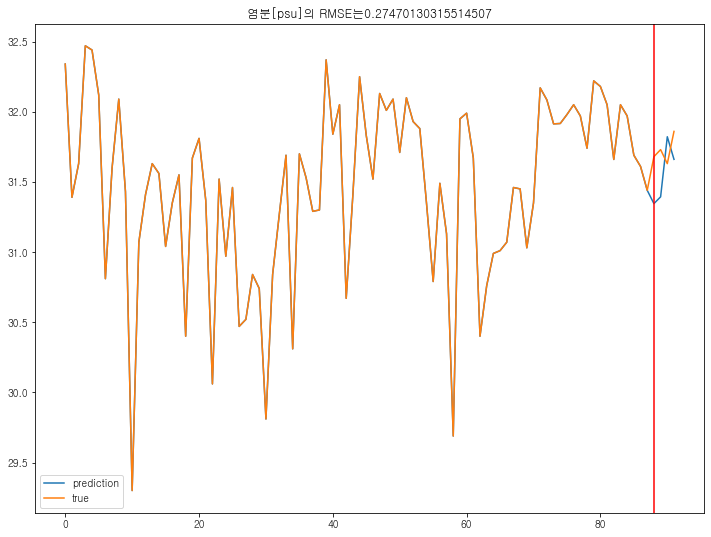

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 2s 5ms/step - loss: 0.0638
Epoch 2/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0454
Epoch 3/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0416
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0399
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0431
Epoch 6/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0407
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0399
Epoch 8/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0352
Epoch 9/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0379
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0355
Epoch 11/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0350
Epoch 12/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0373
Epoch 13/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 

9/9 [==============================] - 0s 5ms/step - loss: 0.0226
Epoch 26/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0320
Epoch 28/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0264
Epoch 30/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 32/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 33/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 34/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0214
Epoch 35/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0273
Epoch 36/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0187
Epoch 37/40
9/9 [==============================] - 0s 7ms/step - loss: 0.020

9/9 [==============================] - 0s 5ms/step - loss: 0.0226
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0187
Epoch 10/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 11/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0220
Epoch 12/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 13/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 14/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 15/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 16/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0153
Epoch 17/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 18/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 19/40
9/9 [==============================] - 0s 11ms/step - loss: 0.0181
Epoch 20/40
9/9 [==============================] - 0s 9ms/step - loss: 0.015

9/9 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 36/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 37/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 38/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 39/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 40/40
9/9 [==============================] - 0s 4ms/step
Epoch 1/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0236
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 3/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0133
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 5/40
9/9 [=

9/9 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 16/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 17/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 18/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 19/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 20/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 21/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 22/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 23/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 24/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 25/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 26/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 27/40
9/9 [==============================] - 0s 6ms/step - loss: 0.003

9/9 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 40/40
9/9 [==============================] - 0s 3ms/step
Epoch 1/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 12/40
9/9 [=====

9/9 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 23/40
9/9 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 24/40
9/9 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 25/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 26/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 27/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 28/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 29/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0

9/9 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 6/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 7/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 10/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 11/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 12/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 13/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 14/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 15/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 16/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 17/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0023
Ep

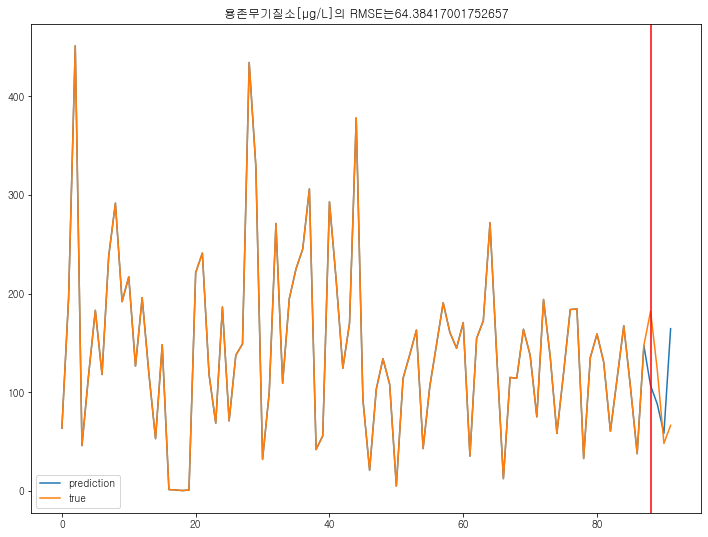

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 2s 5ms/step - loss: 0.1445
Epoch 2/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0644
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 4/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0621
Epoch 5/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0632
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0581
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0554
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0535
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0602
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0523
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0500
Epoch 

9/9 [==============================] - 0s 5ms/step - loss: 0.0206
Epoch 26/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0165
Epoch 27/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0176
Epoch 28/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 29/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 30/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 31/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0198
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0171
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 35/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 37/40
9/9 [==============================] - 0s 7ms/step - loss: 0.017

9/9 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 13/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 14/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0112
Epoch 15/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0105
Epoch 16/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0118
Epoch 17/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 18/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 19/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0108
Epoch 20/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0118

9/9 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 33/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 34/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 35/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 36/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0089
Epoch 37/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 38/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 39/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 40/40
9/9 [==============================] - 0s 3ms/step
Epoch 1/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0081
Epoch 2/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 3/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 4/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 5/40
9/9 [=

9/9 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 16/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 18/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 21/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 22/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 24/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 25/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 27/40
9/9 [==============================] - 0s 6ms/step - loss: 0.003

9/9 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 40/40
9/9 [==============================] - 0s 3ms/step
Epoch 1/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 8/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 12/40
9/9 [=====

9/9 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 23/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 24/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 25/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 26/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 29/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 32/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 34/40
9/9 [==============================] - 0s 5ms/step - loss: 0.001

9/9 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 6/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 8/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 14/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 15/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 16/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 17/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0022
Ep

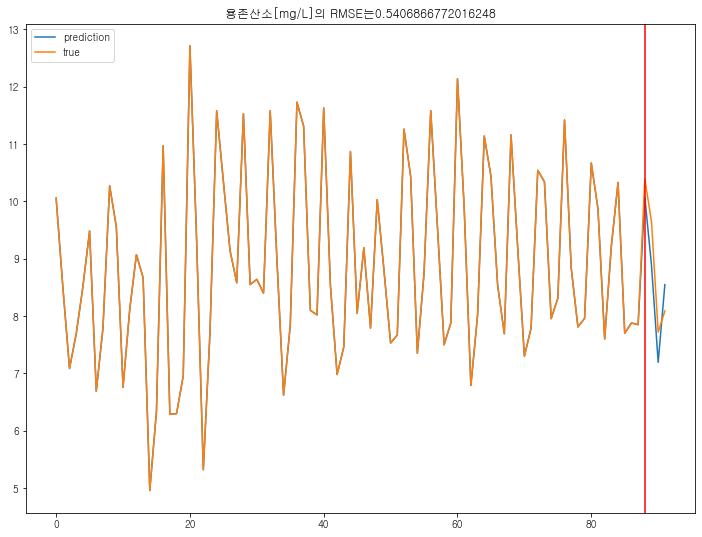

Epoch 1/40


<ipython-input-7-6edd9a5f02c8>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9/9 [==============================] - 1s 5ms/step - loss: 0.0181
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 3/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 4/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 5/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 6/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0132
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 8/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 

9/9 [==============================] - 0s 6ms/step - loss: 0.1545
Epoch 26/40
9/9 [==============================] - 0s 5ms/step - loss: 0.1505
Epoch 27/40
9/9 [==============================] - 0s 5ms/step - loss: 0.1380
Epoch 28/40
9/9 [==============================] - 0s 5ms/step - loss: 0.1477
Epoch 29/40
9/9 [==============================] - 0s 6ms/step - loss: 0.1373
Epoch 30/40
9/9 [==============================] - 0s 5ms/step - loss: 0.1359
Epoch 31/40
9/9 [==============================] - 0s 5ms/step - loss: 0.1348
Epoch 32/40
9/9 [==============================] - 0s 6ms/step - loss: 0.1386
Epoch 33/40
9/9 [==============================] - 0s 6ms/step - loss: 0.1394
Epoch 34/40
9/9 [==============================] - 0s 6ms/step - loss: 0.1425
Epoch 35/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1405
Epoch 36/40
9/9 [==============================] - 0s 5ms/step - loss: 0.1450
Epoch 37/40
9/9 [==============================] - 0s 5ms/step - loss: 0.141

9/9 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 9/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0289
Epoch 10/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 11/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 12/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0349
Epoch 13/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0448
Epoch 14/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0293
Epoch 15/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 16/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0264
Epoch 17/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0186
Epoch 18/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0153
Epoch 19/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 20/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0144

9/9 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 33/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 34/40
9/9 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 35/40
9/9 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 36/40
1/9 [==>...........................] - ETA: 0s - loss: 0.0017

In [ ]:
for i in range(len(col)):
    scaler = MinMaxScaler()
    training_data = scaler.fit_transform(dp[col[i]].values.reshape(-1,1))

    def make_dataset(training_data, t, h=0, test_size=0.04):
    
        X_train = []
        y_train = []
        for i in range(t, len(training_data)-h):
            X_train.append(training_data[i-t:i])
            y_train.append(training_data[i+h])
        X = np.array(X_train)
        y = np.array(y_train)

        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

        return X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = make_dataset(training_data, 16)

    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],1)))
    model.add(GRU(units=128))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=40, batch_size=8)
    final_model = AdaBoostRegressor(GRU_Predictors, n_estimators=20, random_state=42)

    final_model.fit(X_train,y_train)

    preds = final_model.predict(X_test)
    preds = scaler.inverse_transform(preds.reshape(-1,1))
    preds_series = np.hstack([dp[col[i]][:-len(preds)], preds.squeeze(1)])
    aa = list(preds_series)
    
    plt.figure(figsize=(12, 9))
    plt.title(str(col[i])+"의 RMSE는"+str(RMSE(dp[col[i]][88:], aa[88:])))
    plt.plot(aa, label='prediction')
    plt.plot(dp[col[i]], label='true')
    plt.axvline(x=len(dp[col[i]])-len(preds), color='r')
    plt.legend()
    plt.savefig('C:/Users/손호진/Desktop/지역별/가로림연안1_연안/'+col[i].split("[")[0]+'.png', dpi=200)
    plt.show()